# classifications avec TF

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import h5py


# Vérifier la version de TensorFlow
print(f"TensorFlow version: {tf.__version__}")



2025-03-05 15:03:27.205979: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 15:03:27.571621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-05 15:03:27.571690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-05 15:03:27.640645: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 15:03:27.787628: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 15:03:27.791588: I tensorflow/core/platform/cpu_feature_guard.cc:1

TensorFlow version: 2.15.0


In [2]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()

Shape des données d'entraînement: (1000, 64, 64)
Shape des données de test: (200, 64, 64)


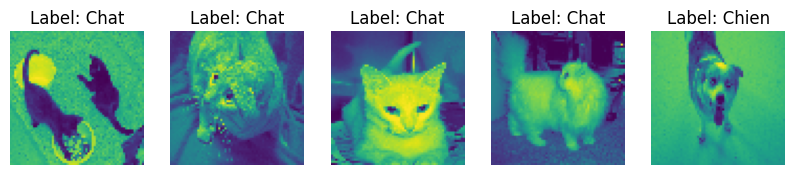

In [3]:
# Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Affichage de quelques informations sur les données
print(f"Shape des données d'entraînement: {X_train.shape}")
print(f"Shape des données de test: {X_test.shape}")

# Visualisation de quelques images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {'Chat' if y_train[i] == 0 else 'Chien'}")
    plt.axis('off')
plt.show()


In [4]:
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]  # Ajoute un canal pour les images en niveaux de gris
    X_test = X_test[..., np.newaxis]
# Affichons la forme de nos données
print("Forme de X_train:", X_train.shape)

Forme de X_train: (1000, 64, 64, 1)


In [5]:
from tensorflow.keras.regularizers import l2

In [96]:

# Avant le modèle.fit()
data_augmentation = Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
])




# Création du modèle CNN avec explications
model = Sequential([
    data_augmentation,
    # Première couche de convolution
    # 32 : nombre de filtres (détecteurs de caractéristiques)
    # (3, 3) : taille de la fenêtre de convolution
    # activation='relu' : fonction d'activation qui garde les valeurs positives
    # input_shape : forme de nos images (hauteur, largeur, canaux)
    Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01), input_shape=(64, 64, 1)),
    # Réduction de la dimension spatiale par 2
    MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    
    # Deuxième couche de convolution : plus de filtres pour détecter des motifs plus complexes
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01),),
    MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

     
    # Troisième couche de convolution : encore plus de filtres
    # Conv2D(64, (3, 3), activation='relu',  padding='same',  kernel_regularizer=l2(0.01), ),
    # MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),
    # Aplatissement : transformation de la matrice 3D en vecteur 1D
    Flatten(),
    
    # Couche dense avec 512 neurones
    # C'est ici que se fait la "prise de décision"
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    
    # Dropout : désactive aléatoirement 50% des neurones pendant l'entraînement
    # Cela évite le surapprentissage
    Dropout(0.4),
    
    # Couche de sortie : 1 neurone avec sigmoid pour la classification binaire
    # sigmoid donne une probabilité entre 0 (chat) et 1 (chien)
    Dense(1, activation='sigmoid')
])
# Affichage de l'architecture du modèle
# model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00007)

# Configuration du modèle
model.compile(
    optimizer=optimizer,  # Algorithme d'optimisation adaptatif
    loss='binary_crossentropy',  # Fonction de perte pour classification binaire
    metrics=['accuracy']  # Mesure de la précision
)
#voir ce qui peut etre intéréssant à approfondir aux niveaux de l'optimizer et des metrics aussi

Epoch 1/80
25/25 [==============================] - 3s 76ms/step - loss: 13.3221 - accuracy: 0.5550 - val_loss: 12.6873 - val_accuracy: 0.5550
Epoch 2/80
25/25 [==============================] - 2s 94ms/step - loss: 12.3517 - accuracy: 0.5475 - val_loss: 11.8022 - val_accuracy: 0.5050
Epoch 3/80
25/25 [==============================] - 1s 43ms/step - loss: 11.4237 - accuracy: 0.5763 - val_loss: 10.9789 - val_accuracy: 0.4900
Epoch 4/80
25/25 [==============================] - 1s 44ms/step - loss: 10.5905 - accuracy: 0.6237 - val_loss: 10.2147 - val_accuracy: 0.4800
Epoch 5/80
25/25 [==============================] - 1s 40ms/step - loss: 9.8469 - accuracy: 0.5838 - val_loss: 9.5031 - val_accuracy: 0.4650
Epoch 6/80
25/25 [==============================] - 1s 41ms/step - loss: 9.1628 - accuracy: 0.5950 - val_loss: 8.8463 - val_accuracy: 0.4700
Epoch 7/80
25/25 [==============================] - 1s 39ms/step - loss: 8.5363 - accuracy: 0.5838 - val_loss: 8.2413 - val_accuracy: 0.4900
Epoch

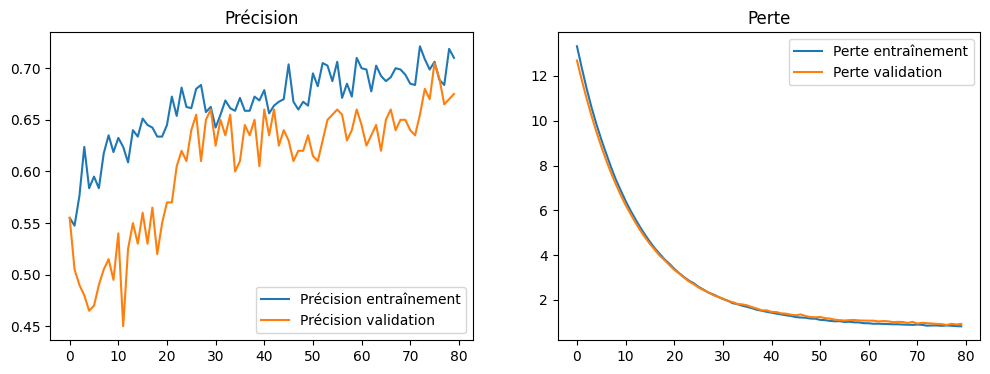

In [97]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=32,
    validation_split=0.2,  # Utilise 20% des données d'entraînement pour la validation
    verbose=1
)

# Visualisation des résultats
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision entraînement')
plt.plot(epochs_range, val_acc, label='Précision validation')
plt.legend()
plt.title('Précision')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perte entraînement')
plt.plot(epochs_range, val_loss, label='Perte validation')
plt.legend()
plt.title('Perte')

plt.show()

7/7 [==============================] - 0s 8ms/step - loss: 1.0139 - accuracy: 0.6250

Précision sur les données de test: 0.6250
1/1 [==============================] - 0s 81ms/step


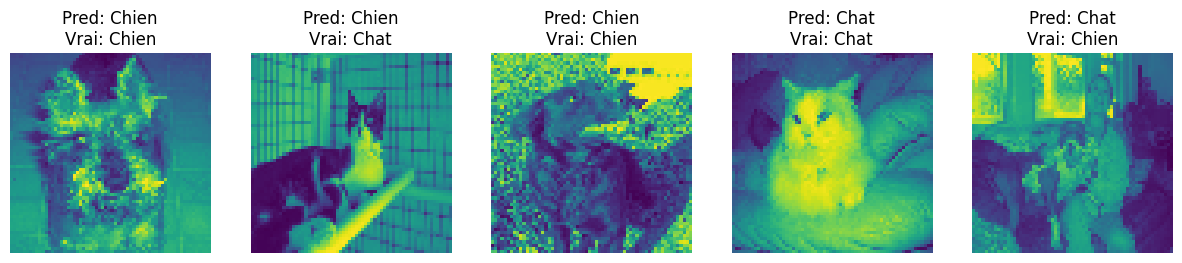

In [98]:
# Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nPrécision sur les données de test: {test_accuracy:.4f}")

# Prédictions sur quelques images de test
predictions = model.predict(X_test[:5])

# Affichage des prédictions
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    pred = 'Chien' if predictions[i] > 0.5 else 'Chat'
    true = 'Chien' if y_test[i] == 1 else 'Chat'
    plt.title(f'Pred: {pred}\nVrai: {true}')
    plt.axis('off')
plt.show()

# Sauvegarde du modèle
# model.save('cat_vs_dog_model.h5')